In [109]:
%matplotlib inline
import re
import pandas
import matplotlib
matplotlib.style.use('ggplot')

In [110]:
def get_stats(path):
    stats_re = re.compile(r'dump at (\d+)\nstats: users (\d+).+?connected \d+ (\d+)', re.M + re.DOTALL)
    with open(path) as f:
        df = pandas.DataFrame.from_records(
            stats_re.findall(f.read()),
            columns=['ts', 'users', 'connected'])
        df = df.convert_objects(convert_numeric=True)
        df['ts'] = pandas.to_datetime(df['ts'] * 1e9)
        return df

In [128]:
def plot_data(path):
    df = get_stats(path)
    plt = df.plot(style=['--', '-'], alpha=0.8)
    plt.set_title(path)
    plt.set_xlabel('seconds')
    plt.set_ylabel('num connections')

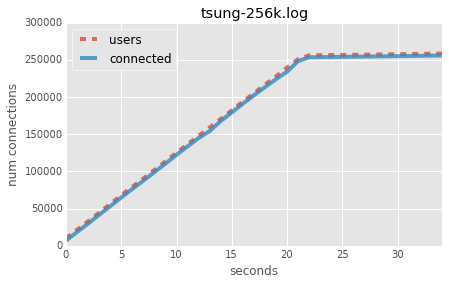

In [129]:
plot_data('tsung-256k.log')

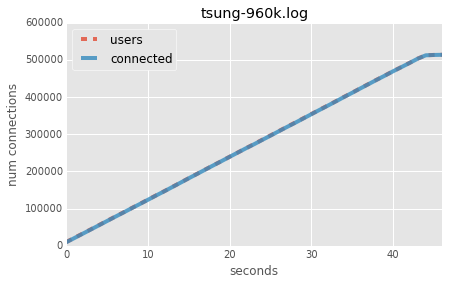

In [130]:
plot_data('tsung-960k.log')